# Initialization with Same Weights


In [1]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline
torch.manual_seed(0)

In [2]:
def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=("epoch " + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), "r")
    plt.xlabel("x")
    if leg == True:
        plt.legend()
    else:
        pass

In [3]:
class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2 = None

    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [4]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # cumulative loss
            total += loss.item()
        cost.append(total)
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(
                model.a1.detach().numpy()[:, 0],
                model.a1.detach().numpy()[:, 1],
                c=Y.numpy().reshape(-1),
            )
            plt.title("activations")
            plt.show()
    return cost

In [5]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [6]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(
        labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs)
    )
    return out

In [7]:
D_in = 1  # size of input
H = 2  # size of hidden layer
D_out = 1  # number of outputs
learning_rate = 0.1  # learning rate

model = Net(D_in, H, D_out)

In [8]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

Same Weights Initialization with all ones for weights and zeros for the bias.


In [9]:
model.state_dict()["linear1.weight"][0] = 1.0
model.state_dict()["linear1.weight"][1] = 1.0
model.state_dict()["linear1.bias"][0] = 0.0
model.state_dict()["linear1.bias"][1] = 0.0
model.state_dict()["linear2.weight"][0] = 1.0
model.state_dict()["linear2.bias"][0] = 0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

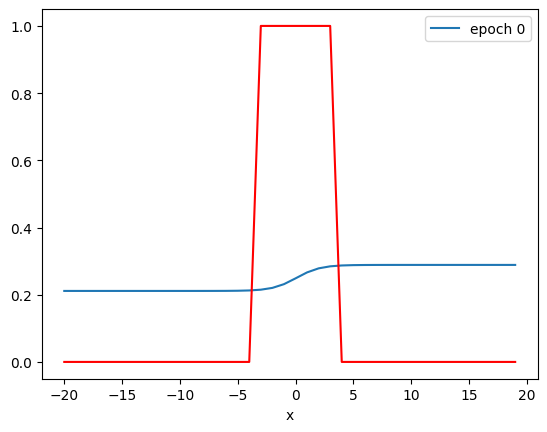

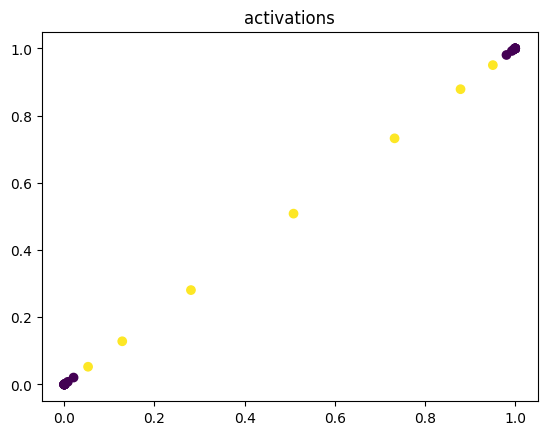

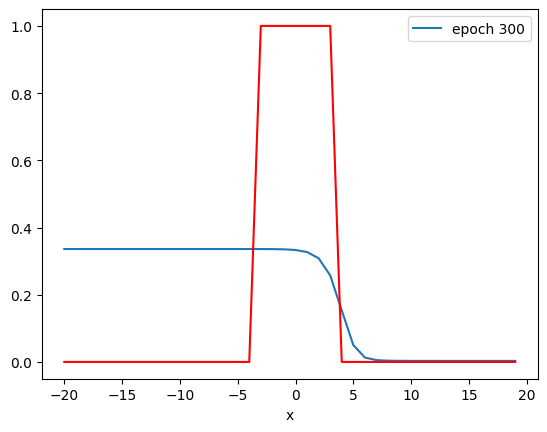

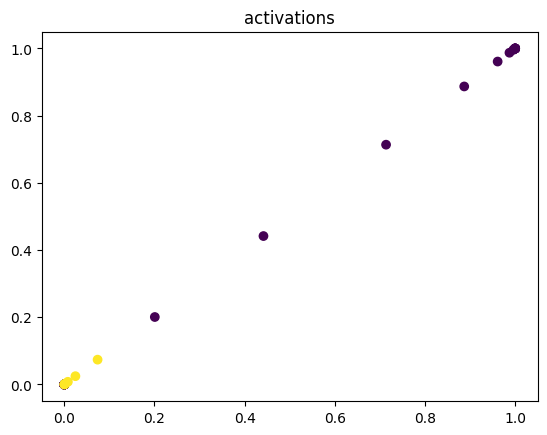

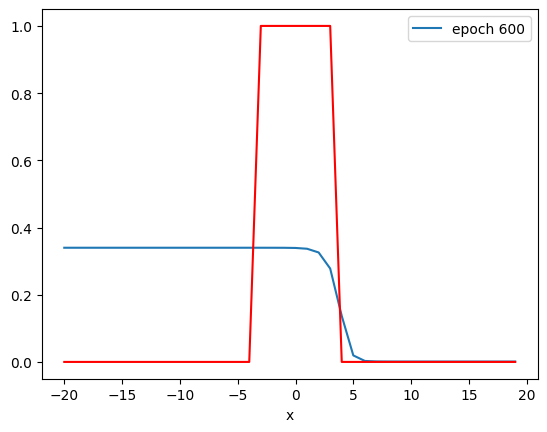

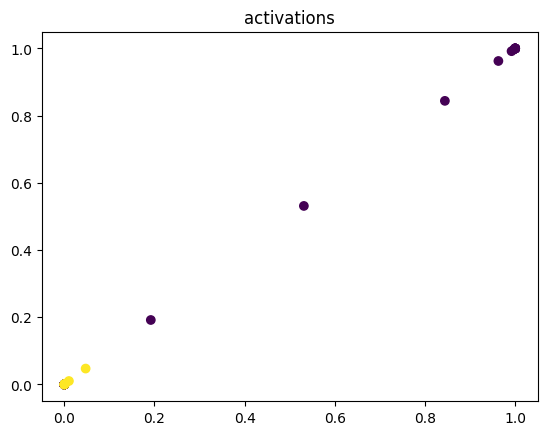

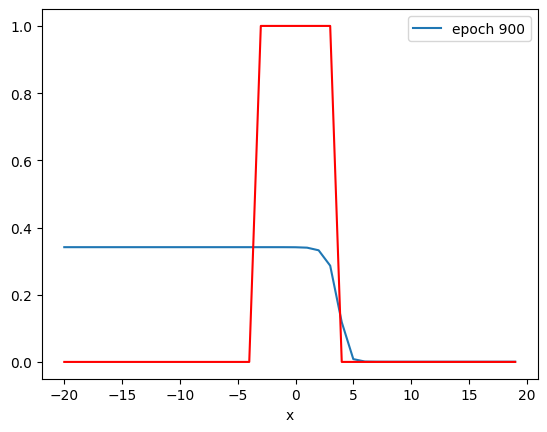

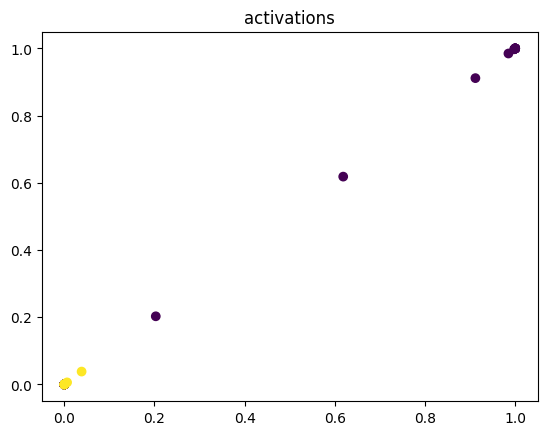

Text(0.5, 1.0, 'cross entropy loss')

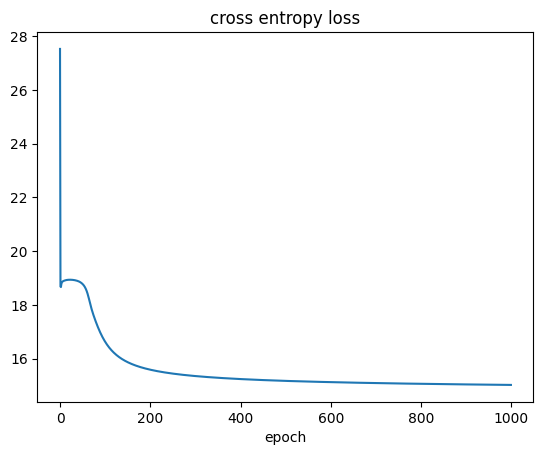

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)

plt.plot(cost_cross)
plt.xlabel("epoch")
plt.title("cross entropy loss")

In [11]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9340],
                      [1.9340]])),
             ('linear1.bias', tensor([-9.0725, -9.0725])),
             ('linear2.weight', tensor([[-3.3976, -3.3976]])),
             ('linear2.bias', tensor([-0.6546]))])

In [12]:
yhat = model(torch.tensor([[-2.0], [0.0], [2.0]]))
yhat

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward0>)

In [14]:
D_in = 1  # size of input
H = 2  # size of hidden layer
D_out = 1  # number of outputs
learning_rate = 0.1

model = Net(D_in, H, D_out)

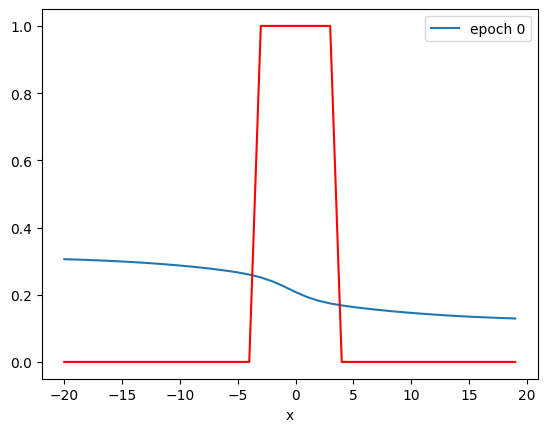

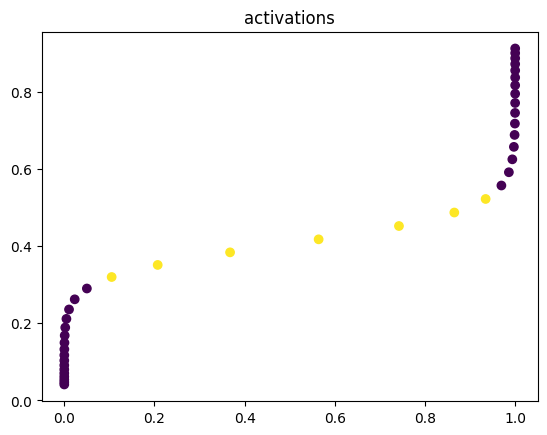

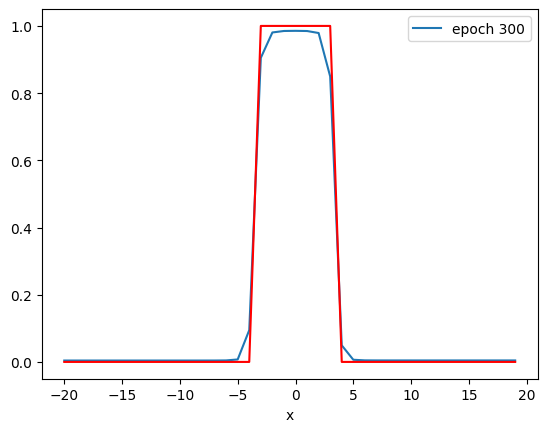

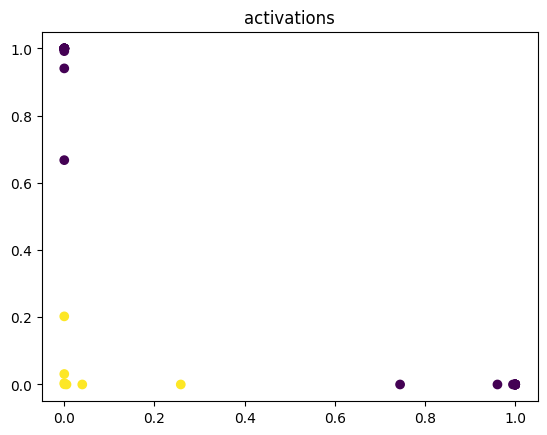

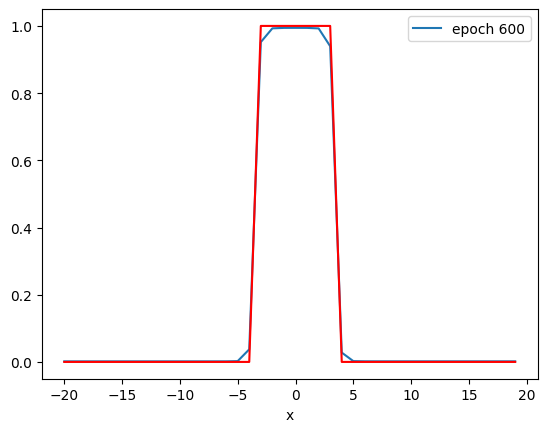

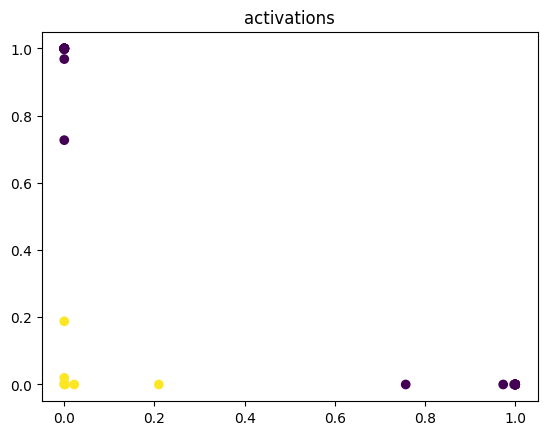

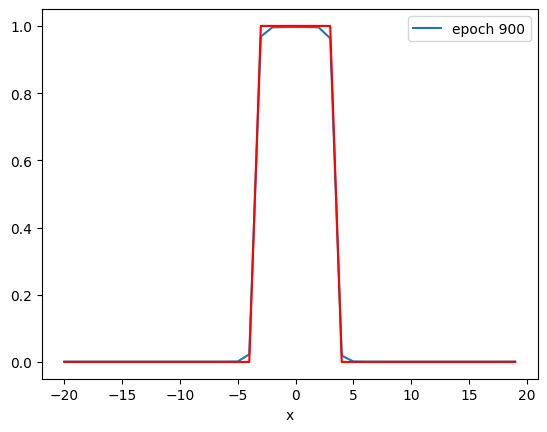

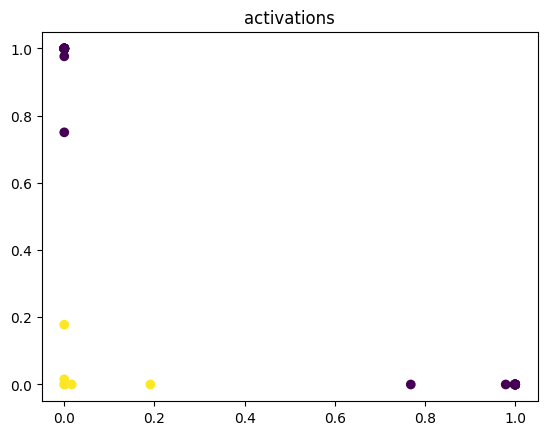

Text(0.5, 1.0, 'cross entropy loss')

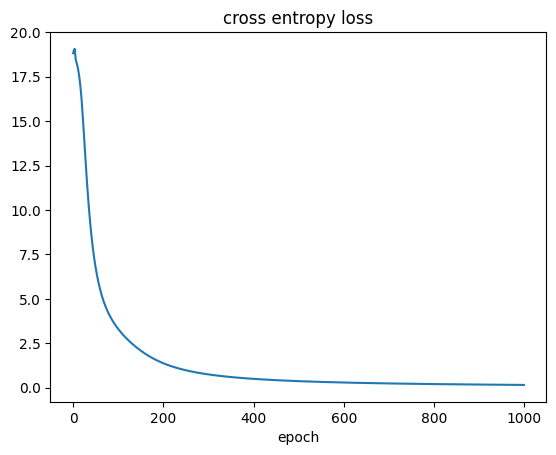

In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)

plt.plot(cost_cross)
plt.xlabel("epoch")
plt.title("cross entropy loss")